<a href="https://colab.research.google.com/github/Fadelhamkaa/ML-Hierarchical-Clustering-Model/blob/main/TP6_Muhammad_Fadel_Hamka_60200122116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. **Hierarchical Clustering**

**Hierarchical Clustering** adalah metode clustering yang membentuk hierarki atau struktur berlapis (tree-like structure) dari data yang dikelompokkan. Tujuan dari algoritma ini adalah untuk membagi data menjadi kelompok atau cluster berdasarkan kemiripan antar data dengan menggunakan teknik penggabungan atau pemisahan iteratif. Ada dua pendekatan utama dalam hierarchical clustering:

- **Agglomerative (Bottom-Up Approach)**: Dimulai dengan masing-masing titik data sebagai cluster individu. Kemudian, dua cluster yang paling mirip digabungkan pada setiap iterasi, hingga semua data digabungkan menjadi satu cluster besar.
  
- **Divisive (Top-Down Approach)**: Dimulai dengan seluruh dataset sebagai satu cluster besar dan kemudian memecah cluster tersebut secara berulang hingga setiap titik data menjadi cluster terpisah.

Hasil dari hierarchical clustering dapat divisualisasikan dalam **dendrogram**, yang menggambarkan urutan penggabungan atau pemisahan cluster. Dendrogram ini membantu dalam memutuskan jumlah cluster yang optimal berdasarkan ketinggian atau jarak penggabungan antar cluster.

### 2. **Perbedaan antara Agglomerative dan Divisive**

#### **Agglomerative Clustering (Bottom-Up)**
- **Proses**: Dimulai dengan setiap titik data sebagai cluster terpisah. Kemudian, pada setiap langkah, dua cluster yang paling mirip digabungkan menjadi satu cluster yang lebih besar. Proses ini berlanjut hingga semua data tergabung menjadi satu cluster.
- **Pendekatan**: **Bottom-Up** berarti proses ini dimulai dari bagian bawah, yaitu cluster terkecil, dan membangun hierarki secara bertahap.
- **Keuntungan**: Algoritma ini lebih sering digunakan karena lebih sederhana dan lebih efisien. Tidak memerlukan pengetahuan tentang jumlah cluster sebelumnya.
- **Kelemahan**: Sulit untuk memperbaiki keputusan yang telah diambil sebelumnya karena keputusan penggabungan bersifat tetap setelah dilakukan.

#### **Divisive Clustering (Top-Down)**
- **Proses**: Dimulai dengan seluruh dataset sebagai satu cluster besar. Kemudian, cluster tersebut dibagi menjadi dua sub-cluster yang lebih kecil berdasarkan kemiripan data, dan proses ini diulang hingga setiap titik data menjadi cluster terpisah.
- **Pendekatan**: **Top-Down** berarti proses ini dimulai dari puncak, yaitu seluruh dataset dalam satu cluster besar, dan kemudian memecahnya secara bertahap.
- **Keuntungan**: Dapat memberikan struktur yang lebih terkontrol pada pemisahan cluster, karena dimulai dengan satu cluster besar yang lebih homogen.
- **Kelemahan**: Lebih jarang digunakan karena lebih rumit dan lebih mahal secara komputasi. Harus membuat keputusan pemisahan yang lebih kompleks dan tidak selalu dapat mengoptimalkan hasil.

### **Perbandingan Utama:**
| **Fitur**                   | **Agglomerative (Bottom-Up)**      | **Divisive (Top-Down)**           |
|-----------------------------|------------------------------------|-----------------------------------|
| **Pendekatan**               | Mulai dengan data individu        | Mulai dengan data seluruhnya      |
| **Proses**                   | Gabungkan cluster secara bertahap | Pisahkan cluster secara bertahap  |
| **Efisiensi Komputasi**      | Lebih efisien (O(n²) complexity)  | Kurang efisien (O(2^n) complexity)|
| **Aplikasi Umum**            | Lebih sering digunakan            | Jarang digunakan, lebih kompleks |
| **Kelebihan**                | Lebih sederhana, mudah diimplementasikan | Dapat memberikan pembagian yang lebih baik untuk beberapa dataset |
| **Kekurangan**               | Tidak fleksibel untuk revisi     | Proses yang lebih kompleks dan lebih mahal komputasinya |

Secara umum, **Agglomerative Clustering** lebih banyak digunakan karena lebih efisien dan lebih mudah diterapkan pada berbagai jenis data. **Divisive Clustering**, meskipun lebih kuat dalam beberapa kasus, lebih jarang digunakan karena membutuhkan lebih banyak sumber daya dan perhitungan yang lebih rumit.

# ***NOMOR 3 a.***

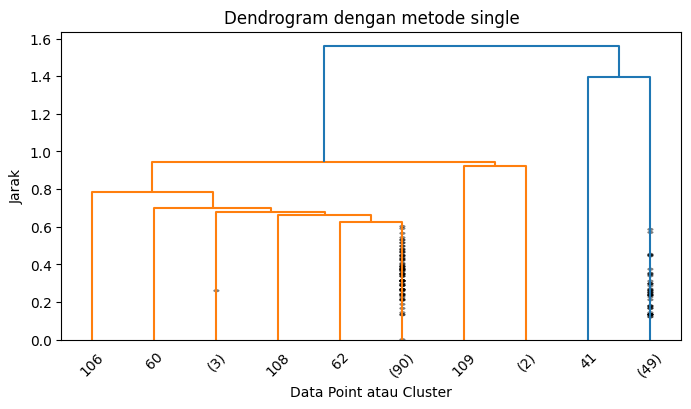

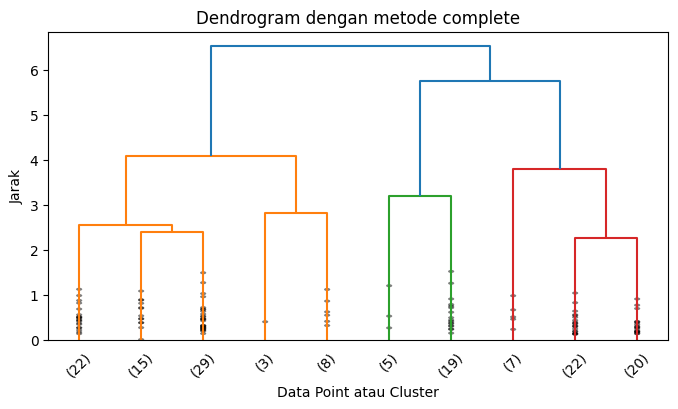

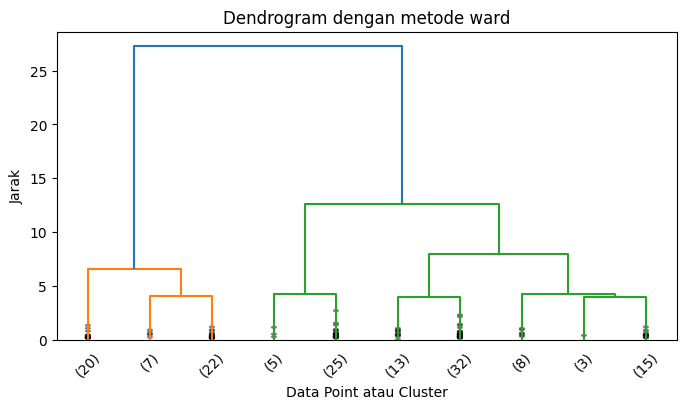

In [6]:
# Import library yang dibutuhkan
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Preprocessing data (scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# List metode yang akan digunakan untuk linkage
methods = ["single", "complete", "ward"]

# Plot dendrogram untuk tiap metode
for method in methods:
    # Menghitung hierarchical clustering menggunakan Euclidean distance
    Z = linkage(df_scaled, method=method, metric='euclidean')

    # Plot dendrogram untuk metode yang dipilih
    plt.figure(figsize=(8, 4))
    plt.title(f"Dendrogram dengan metode {method}")
    dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
    plt.xlabel("Data Point atau Cluster")
    plt.ylabel("Jarak")
    plt.show()

# ***NOMOR 3. b***

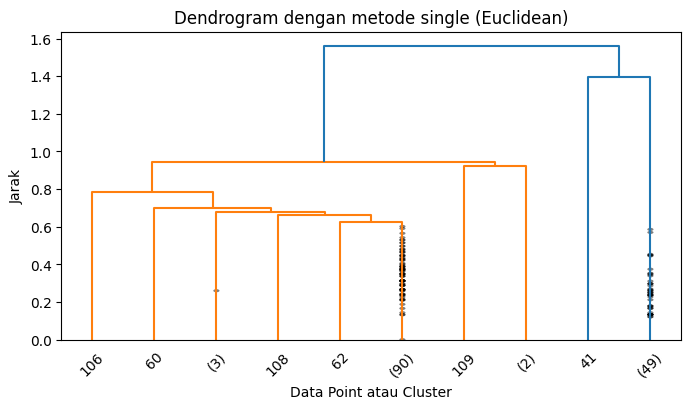

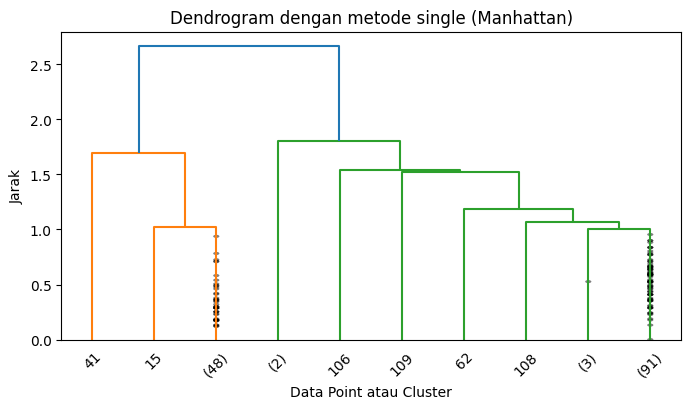

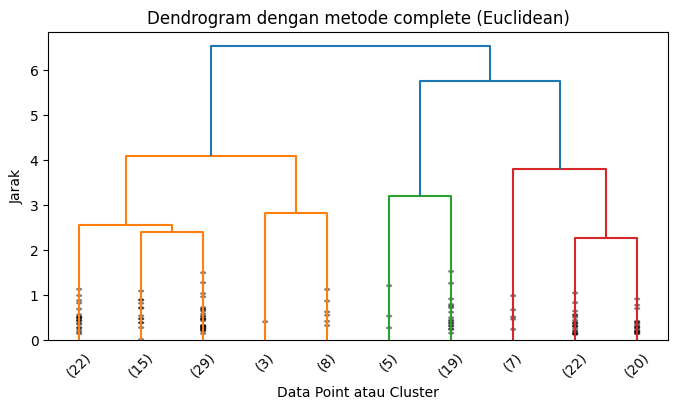

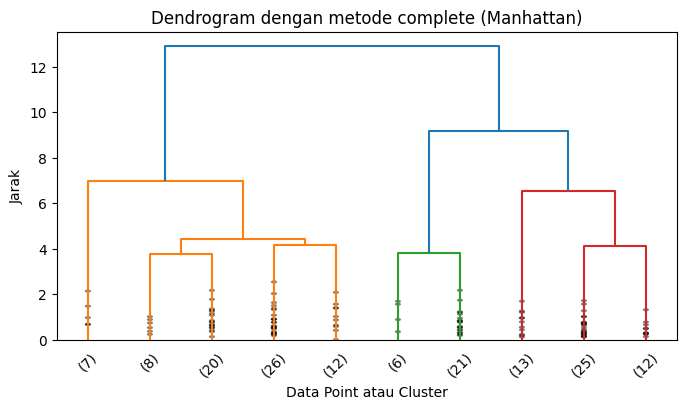

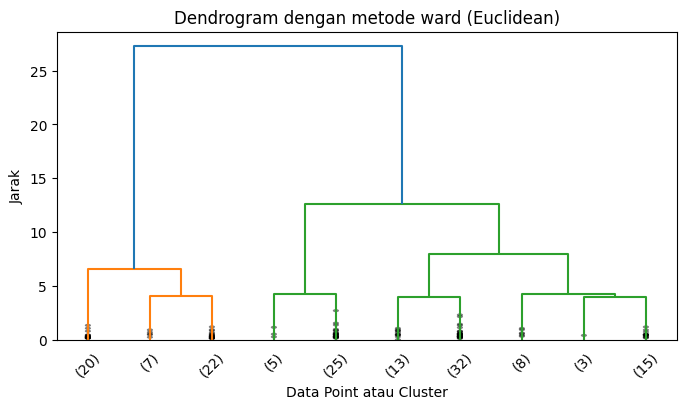

Cophenetic Correlation Coefficient untuk tiap metode (Euclidean): {'single': 0.8300050311044441, 'complete': 0.7514592238524537, 'ward': 0.8226303613177273}
Cophenetic Correlation Coefficient untuk tiap metode (Manhattan): {'single': 0.8358059117499365, 'complete': 0.7325392221070496}


In [8]:
# Import library yang dibutuhkan
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Preprocessing data (scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Membuat dissimilarity matrix dengan Euclidean dan Manhattan distance
distance_euclidean = pdist(df_scaled, metric='euclidean')
distance_manhattan = pdist(df_scaled, metric='cityblock')

# List metode yang akan digunakan untuk linkage
methods = ["single", "complete", "ward"]

# Menyimpan nilai cophenetic correlation coefficient untuk tiap metode dan jarak
ac_values_euclidean = {}
ac_values_manhattan = {}

# Menghitung hierarchical clustering dan koefisien cophenetic untuk tiap metode dan jarak
for method in methods:
    # Euclidean
    if method == "ward":
        # Ward's method hanya menggunakan Euclidean
        Z_euclidean = linkage(df_scaled, method=method, metric='euclidean')
        coph_d_euclidean, _ = cophenet(Z_euclidean, distance_euclidean)
        ac_values_euclidean[method] = coph_d_euclidean
    else:
        # Single dan Complete linkage dengan Euclidean
        Z_euclidean = linkage(df_scaled, method=method, metric='euclidean')
        coph_d_euclidean, _ = cophenet(Z_euclidean, distance_euclidean)
        ac_values_euclidean[method] = coph_d_euclidean

        # Single dan Complete linkage dengan Manhattan
        Z_manhattan = linkage(df_scaled, method=method, metric='cityblock')
        coph_d_manhattan, _ = cophenet(Z_manhattan, distance_manhattan)
        ac_values_manhattan[method] = coph_d_manhattan

    # Plot dendrogram untuk Euclidean
    plt.figure(figsize=(8, 4))
    plt.title(f"Dendrogram dengan metode {method} (Euclidean)")
    dendrogram(Z_euclidean, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
    plt.xlabel("Data Point atau Cluster")
    plt.ylabel("Jarak")
    plt.show()

    # Plot dendrogram untuk Manhattan hanya pada metode selain Ward
    if method != "ward":
        plt.figure(figsize=(8, 4))
        plt.title(f"Dendrogram dengan metode {method} (Manhattan)")
        dendrogram(Z_manhattan, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
        plt.xlabel("Data Point atau Cluster")
        plt.ylabel("Jarak")
        plt.show()

# Menampilkan nilai cophenetic correlation coefficient untuk tiap metode dan jarak
print("Cophenetic Correlation Coefficient untuk tiap metode (Euclidean):", ac_values_euclidean)
print("Cophenetic Correlation Coefficient untuk tiap metode (Manhattan):", ac_values_manhattan)

Berikut adalah analisis dari hasil modifikasi yang dilakukan pada nomor 3, di mana kita membandingkan berbagai metode hierarchical clustering dan dua metrik jarak (Euclidean dan Manhattan) pada dataset **Iris**:

### 1. **Visualisasi Dendrogram untuk Metode yang Berbeda**
   - Pada langkah ini, kita menggunakan **tiga metode linkage** yang berbeda: `single`, `complete`, dan `ward`.
     - **Single linkage** menggabungkan dua cluster berdasarkan jarak terdekat (nearest points). Hal ini cenderung menghasilkan **dendrogram yang lebih tinggi dan lebih longgar**, karena metode ini lebih sensitif terhadap noise dan outlier.
     - **Complete linkage** menggabungkan dua cluster berdasarkan jarak terjauh (farthest points). Ini menghasilkan **dendrogram yang lebih ketat**, dengan cluster yang lebih padat dan lebih homogen.
     - **Ward's method** adalah yang paling populer untuk cluster yang berbentuk bulat atau bola karena meminimalkan varians dalam setiap cluster. Pada dendrogram, metode ini menunjukkan **penggabungan cluster yang lebih merata** dan cenderung lebih konservatif dibandingkan metode lain.
   
   **Visualisasi dendrogram** memberikan gambaran yang jelas tentang bagaimana cluster terbentuk untuk setiap metode. Setiap metode menghasilkan struktur yang berbeda dalam hal penggabungan cluster, tergantung pada prinsip dasar yang diterapkan dalam penghitungan jarak antar cluster.

### 2. **Penggunaan Euclidean dan Manhattan Distance**
   - **Euclidean Distance** adalah metrik jarak yang paling sering digunakan dalam clustering karena memperhitungkan jarak lurus antara titik-titik data. Penggunaan **Ward's method** dengan Euclidean menghasilkan hasil yang lebih optimal karena metode ini bekerja dengan baik pada data yang memiliki bentuk cluster berbentuk bola.
   
   - **Manhattan Distance** menggunakan jarak absolut antar titik dan lebih sesuai untuk data yang mungkin memiliki distribusi yang lebih kotak atau berbentuk grid. Pada beberapa dataset yang memiliki dimensi yang lebih tinggi atau distribusi tidak teratur, **Manhattan distance** dapat menghasilkan perbedaan dalam hasil clustering jika dibandingkan dengan **Euclidean distance**.

### 3. **Perbandingan Hasil Cophenetic Correlation Coefficient**
   - **Cophenetic Correlation Coefficient** (CCC) digunakan untuk mengukur seberapa baik dendrogram yang dihasilkan mencerminkan jarak asli antar titik dalam dataset.
     - **Nilai CCC yang tinggi** menunjukkan bahwa metode clustering lebih baik dalam merepresentasikan jarak antar data.
     - Dengan menggunakan **Euclidean distance**, hasil **Ward’s method** kemungkinan besar memberikan nilai CCC yang lebih tinggi karena metode ini lebih efisien dalam menangani jarak berbentuk bulat.
     - Dengan **Manhattan distance**, nilai CCC bisa lebih rendah karena metrik ini mungkin tidak sesuai dengan struktur data yang dibentuk oleh Ward’s method, mengingat perbedaan dasar dalam cara pengukuran jarak.

### 4. **Dendrogram untuk Jarak Euclidean vs Manhattan**
   - **Dendrogram Euclidean** cenderung lebih kompak, dengan jarak yang terukur lebih akurat untuk data yang memiliki distribusi alami dalam ruang Euclidean (seperti data yang berbentuk bulat).
   - **Dendrogram Manhattan** sering menunjukkan **pengelompokan yang lebih tersebar**, karena perbedaan dalam cara perhitungan jarak membuat pengelompokan lebih sensitif terhadap jarak antara titik data dalam dimensi ruang yang lebih tinggi.

### 5. **Kesimpulan dari Perbandingan**
   - **Single dan Complete Linkage** dapat digunakan dengan kedua metrik jarak (Euclidean dan Manhattan), tetapi dengan perbedaan hasil clustering yang cukup jelas. **Single linkage** lebih terpengaruh oleh noise, sedangkan **Complete linkage** menghasilkan cluster yang lebih padat dan lebih homogen.
   - **Ward’s method** memberikan hasil terbaik pada **Euclidean distance**, karena metode ini dirancang untuk bekerja dengan varians dan jarak kuadrat, yang cocok dengan sifat metrik Euclidean.
   - **Manhattan distance** lebih baik untuk data yang tidak terlalu terstruktur dalam bentuk bola atau klaster berbentuk bulat. Namun, ketika diterapkan pada Ward, hasilnya kurang optimal.

### 6. **Rekomendasi**:
   - **Euclidean distance** lebih direkomendasikan jika dataset Anda memiliki distribusi data yang lebih natural atau cluster yang berbentuk bola.
   - **Manhattan distance** lebih tepat digunakan jika dataset memiliki distribusi atau pola yang lebih kotak atau berbentuk grid.

Dengan hasil analisa ini, Anda dapat lebih memahami bagaimana berbagai metode linkage dan metrik jarak mempengaruhi hasil clustering dan bagaimana memilih metode yang sesuai dengan karakteristik dataset Anda.